In [524]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [525]:
pwd

'c:\\Users\\johan\\OneDrive - Uppsala universitet\\Dokument\\Termin 6\\Examensarbete\\Examensarbete_analys\\Examensarbete_analys'

<h1>Inläsning, transformering och kontroll av data</h1>

In [526]:

df = pd.read_csv("data.csv", encoding="utf-8", delimiter = ",")

In [527]:
df = df.drop(df.index[:3])
df = df.reset_index(drop=True)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 42 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Tidstämpel                                                                                                          87 non-null     object 
 1   Kön                                                                                                                 87 non-null     object 
 2   Vilken årskurs går du i?                                                                                            87 non-null     object 
 3   Vilket av följande beskriver bäst ditt program?                                                                     87 non-null     object 
 4   Hur många invånare har

In [529]:
df.drop(columns="Tidstämpel", axis=1, inplace=True)

In [530]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen för de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [531]:
df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\johan\AppData\Local\Temp\ipykernel_37072\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({


In [532]:
kolumner_att_ändra = df.columns[[6, 7, 8, 9, 10]]

df[kolumner_att_ändra] = df[kolumner_att_ändra].replace({
    7: 1,
    6: 2,
    5: 3,
    3: 5,
    2: 6,
    7: 1
})

In [533]:
print(kolumner_att_ändra)

Index(['Jag väljer "Godkänn alla cookies".', 'Jag väljer "Tillåt alla". ',
       'Jag väljer "Acceptera alla cookies". ',
       'Jag väljer "Acceptera alla cookies". .1',
       'Jag väljer "Tillåt alla". .1'],
      dtype='object')


<h1>Kategorisering</h1>

In [534]:
df_demografi = df.iloc[:,:6]

In [535]:
# Välj kolumnerna med index 19 till 27 (slutet är exklusivt så vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]

# Platta ut alla värden till en lång array och räkna ut medelvärde
medelvärde_k = utvalda_k.values.flatten().mean()
medelvärde_k1 = utvalda_k1.values.flatten().mean()
medelvärde_k2 = utvalda_k2.values.flatten().mean()
medelvärde_a = utvalda_a.values.flatten().mean()
medelvärde_a1 = utvalda_a1.values.flatten().mean()
medelvärde_a2 = utvalda_a2.values.flatten().mean()
medelvärde_b = utvalda_b.values.flatten().mean()
medelvärde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelvärde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelvärde_b2 = utvalda_b2.values.flatten().mean()
medelvärde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelvärdet som enda värde
df_kategoriserad = pd.DataFrame({
                      'K': [medelvärde_k],
                      'K_grundläggande': [medelvärde_k1],
                      'K_integritet': [medelvärde_k2],
                      'A': [medelvärde_a],
                      'A_egen_data': [medelvärde_a1],
                      'A_gen_insamling': [medelvärde_a2],
                      'B': [medelvärde_b],
                      'B_bilder_dark': [medelvärde_b1_dark],
                      'B_bilder_no_dark': [medelvärde_b1_no_dark],
                      'B2_agerande': [medelvärde_b2],
                      'B3_aktivt agerande': [medelvärde_b3]
                      })

In [536]:
df_kategoriserad.head()

,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,3.859195,3.662835,4.055556,4.291188,4.170977,4.531609,2.545455,2.118774,2.275862,3.084291,2.613027


In [537]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'Kön': df.iloc[:,0],
                      'Årskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Invånare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundläggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [538]:
df_resp_sum.head()

,Kön,Årskurs,Program,Invånare,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,Vill ej ange,Årskurs 3,Teknik,liten,3.08,3.000000,3.166667,3.083333,3.250,2.75,4.181818,5.333333,5.0,3.333333,3.333333
1,Man,Årskurs 3,Naturvetenskap,medel,3.25,1.833333,4.666667,5.500000,5.500,5.50,2.181818,1.000000,3.5,3.666667,1.000000
2,Man,Årskurs 3,Samhällsvetenskap,medel,1.58,2.166667,1.000000,4.833333,4.625,5.25,1.545455,1.000000,2.0,2.333333,1.000000
3,Kvinna,Årskurs 3,Naturvetenskap,liten,1.67,2.333333,1.000000,6.250000,6.000,6.75,1.363636,1.000000,1.0,2.333333,1.000000
4,Kvinna,Årskurs 3,Samhällsvetenskap,liten,2.33,1.166667,3.500000,4.666667,4.375,5.25,1.000000,1.000000,1.0,1.000000,1.000000


<h1>Demografi</h1>

In [539]:
df_demografi.head()

,Kön,Vilken årskurs går du i?,Vilket av följande beskriver bäst ditt program?,Hur många invånare har orten där du bor?,Jag känner till GDPR.,Jag litar på att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.
0,Vill ej ange,Årskurs 3,Teknik,liten,2.0,3.0
1,Man,Årskurs 3,Naturvetenskap,medel,5.0,5.0
2,Man,Årskurs 3,Samhällsvetenskap,medel,1.0,7.0
3,Kvinna,Årskurs 3,Naturvetenskap,liten,5.0,4.0
4,Kvinna,Årskurs 3,Samhällsvetenskap,liten,5.0,3.0


<module 'matplotlib' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

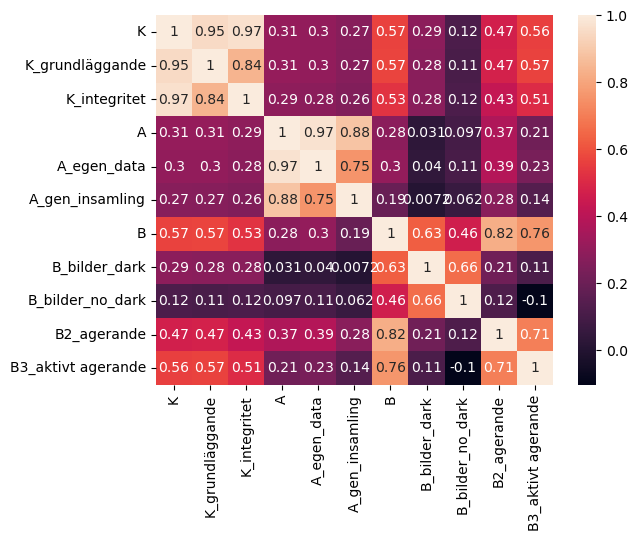

In [540]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelvärde av kategorier</h1>

<h1>Reliabilitetstest</h1>

In [541]:
def cronbach_alpha(df):
  k = df.shape[1]
  varians_total = df.sum(axis=1).var(ddof=1)
  varians_frågor = df.var(axis=0,ddof=1).sum()

  alpha = (k / (k - 1)) * (1 - varians_frågor / varians_total)

  return round(alpha, 3)

In [542]:
k_rel = cronbach_alpha(utvalda_k)
k1_rel = cronbach_alpha(utvalda_k1)
k2_rel = cronbach_alpha(utvalda_k2)

a_rel = cronbach_alpha(utvalda_a)
a1_rel = cronbach_alpha(utvalda_a1)
a2_rel = cronbach_alpha(utvalda_a2)

b_rel = cronbach_alpha(utvalda_b)
b1_dark_rel = cronbach_alpha(utvalda_b1_dark)
b1_no_dark_rel = cronbach_alpha(utvalda_b1_no_dark)
b2_rel = cronbach_alpha(utvalda_b2)
b3_rel = cronbach_alpha(utvalda_b3)

attityd = cronbach_alpha(df.iloc[:,29:])
beteende = cronbach_alpha(df.iloc[:, 6:17])
Beteende_bilder = cronbach_alpha(df.iloc[:, 11:17])
print("Kunskap =", k_rel, k1_rel, k2_rel, "attityd =", a_rel, a1_rel, a2_rel, "beteende =", b_rel, b1_dark_rel,b1_no_dark_rel,b2_rel,b3_rel)

Kunskap = 0.962 0.924 0.952 attityd = 0.934 0.925 0.809 beteende = 0.814 0.89 0.785 0.732 0.82


<h1>Korrelationstest</h1>

In [543]:
korrelation = df_resp_sum.iloc[:,4:].corr(method='pearson')

<module 'matplotlib' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

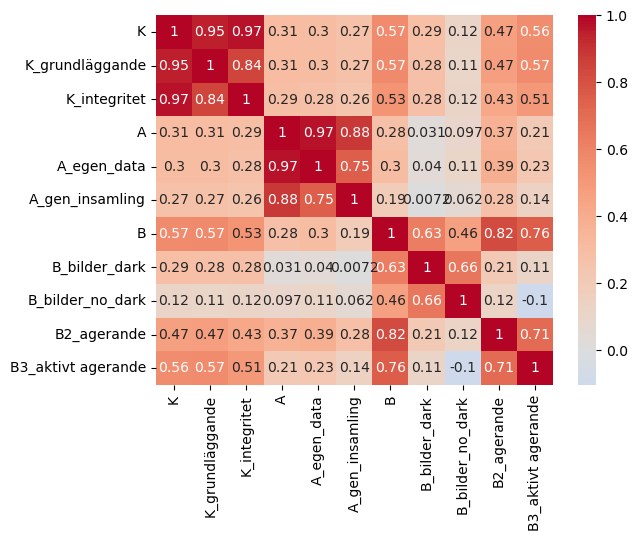

In [544]:
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt

<h1>Regressionstest</h1>

In [545]:
from sklearn.linear_model import LinearRegression

# Skapa modellen
modell_KA = LinearRegression()
modell_AB = LinearRegression()

# Reshape krävs eftersom sklearn vill ha 2D-array för X
X_K = df_resp_sum[['K']]
y_A = df_resp_sum['A']

X_A = df_resp_sum[['A']]
y_B = df_resp_sum['B']

# Träna modellerna
modell_KA.fit(X_K, y_A)
modell_AB.fit(X_A, y_B)

# Visa koefficienter
print("K → A:")
print(f"  Lutning (slope): {modell_KA.coef_[0]:.3f}")
print(f"  Intercept: {modell_KA.intercept_:.3f}")
print()

print("A → B:")
print(f"  Lutning (slope): {modell_AB.coef_[0]:.3f}")
print(f"  Intercept: {modell_AB.intercept_:.3f}")

K → A:
  Lutning (slope): 0.258
  Intercept: 3.296

A → B:
  Lutning (slope): 0.215
  Intercept: 1.623


<module 'matplotlib' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

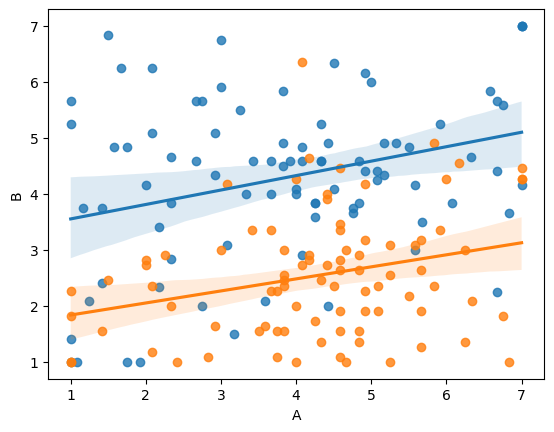

In [546]:
# K → A
sns.regplot(x='K', y='A', data=df_resp_sum)
plt

# A → B
sns.regplot(x='A', y='B', data=df_resp_sum)
plt

<module 'matplotlib' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

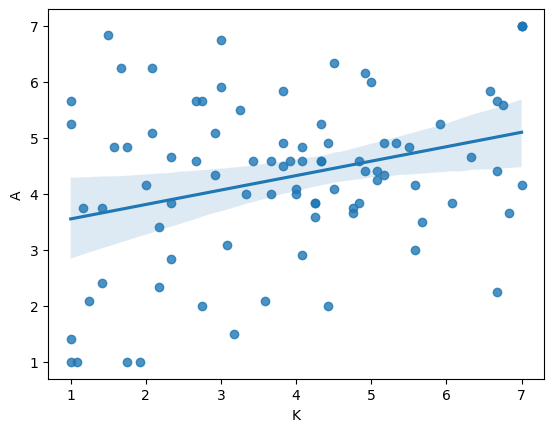

In [547]:
# K → A
sns.regplot(x='K', y='A', data=df_resp_sum)
plt

<module 'matplotlib' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

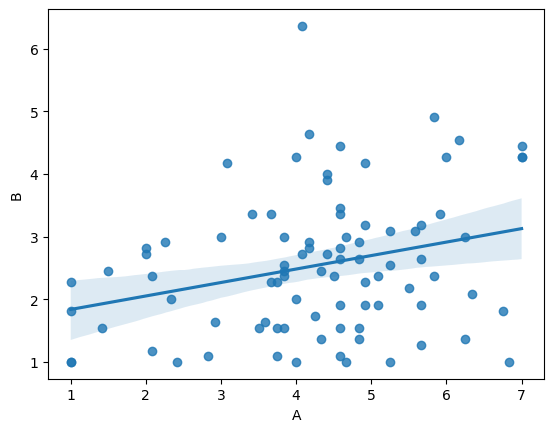

In [548]:
# A → B
sns.regplot(x='A', y='B', data=df_resp_sum)
plt

In [549]:
# Modell 1: K → A
X_K = df_resp_sum[['K']]
y_A = df_resp_sum['A']
modell_KA = LinearRegression()
modell_KA.fit(X_K, y_A)
r2_KA = modell_KA.score(X_K, y_A)

# Modell 2: A → B
X_A = df_resp_sum[['A']]
y_B = df_resp_sum['B']
modell_AB = LinearRegression()
modell_AB.fit(X_A, y_B)
r2_AB = modell_AB.score(X_A, y_B)

# Modell 3: K → B

modell_KB = LinearRegression()
modell_KB.fit(X_K, y_B)
r2_KB = modell_KB.score(X_K, y_B)

# Resultat
print("K → A:")
print(f"  Lutning (slope): {modell_KA.coef_[0]:.3f}")
print(f"  Intercept: {modell_KA.intercept_:.3f}")
print(f"  R²: {r2_KA:.3f}")
print()

print("A → B:")
print(f"  Lutning (slope): {modell_AB.coef_[0]:.3f}")
print(f"  Intercept: {modell_AB.intercept_:.3f}")
print(f"  R²: {r2_AB:.3f}")
print()

print("K → B:")
print(f"  Lutning (slope): {modell_KB.coef_[0]:.3f}")
print(f"  Intercept: {modell_KB.intercept_:.3f}")
print(f"  R²: {r2_KB:.3f}")

K → A:
  Lutning (slope): 0.258
  Intercept: 3.296
  R²: 0.095

A → B:
  Lutning (slope): 0.215
  Intercept: 1.623
  R²: 0.079

K → B:
  Lutning (slope): 0.363
  Intercept: 1.143
  R²: 0.323


<h1>T-test/ANOVA</h1>